In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Predicting House Prices

In [41]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/kc_house_data.csv'
sales = pd.read_csv(url)
sales.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

This dataset contains house sale prices for King County, which includes Seattle. 
It includes homes sold between May 2014 and May 2015.

There are 21 columns:

In [6]:
sales.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

| Feature | Description |
| :- | -: |
| id | Unique ID for each home sold |
| date | Date of the home sale |
| price | Price of each home sold |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| sqft_living | Square footage of the apartments interior living space |
| sqft_lot | Square footage of the land space |
| floors | Number of floors |
| waterfront | A dummy variable for whether the apartment was overlooking the waterfront or not |
| view | An index from 0 to 4 of how good the view of the property was |
| condition | An index from 1 to 5 on the condition of the apartment |
| grade | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| sqft_above | The square footage of the interior housing space hat is above ground level |
| sqft_basement | The square footage of the interior housing space that is below ground level |
| yr_built | The year the house was initially built |
| yr_renovated | The year of the house's last renovation |
| zipcode | What zipcode area the house is in |
| lat | Latitude |
| long | Longitude |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15 | The square footage of the land lots of the nearest 15 neighbors |

The **goal** is to train a linear model that predicts house prices

**Preprocessing:** The price variable is right skewed. So we need to transform this variable and make it more normally distributed.

Text(0.5, 1.0, 'Distribution of house prices')

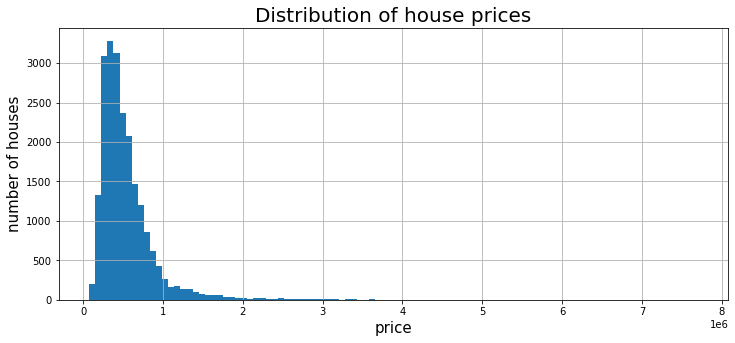

In [42]:
# price distribution
plt.figure(figsize=(12,5))
sales.price.hist(bins=100)
plt.xlabel('price',fontsize=15)
plt.ylabel('number of houses',fontsize=15)
plt.title('Distribution of house prices',fontsize=20)

We will "log-transform" the price variable.
This will make the variable more normal.

In [43]:
sales['log_price'] = sales.price.apply(np.log)

Text(0.5, 1.0, 'Distribution of house log-prices')

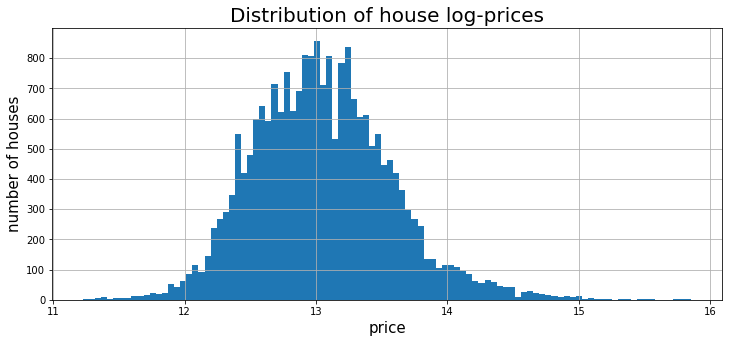

In [44]:
# log-price distribution
plt.figure(figsize=(12,5))
sales.log_price.hist(bins=100)
plt.xlabel('price',fontsize=15)
plt.ylabel('number of houses',fontsize=15)
plt.title('Distribution of house log-prices',fontsize=20)

**Part 1** Define X and y (y should contain the log-transformed prices) from the "sales" DataFrame, and then split X and y into training and testing sets

**Part 2:** Use the training set to train a linear regression model.
Plot the coefficients of your linear model.

**Part 3:** Evaluate the performance of your linear model on the test set.

Note: The RMSE (root mean squared error) is just the square root of the scikit-learn function mean_squared_error.

**Part 4:** Plot the first 50 observed and predicted house prices (from the test set)

**Part 5:** Try to improve your linear model performance.

Ideas:

- add polynomial features
- add other features. For example, the total number of bathrooms is not very useful if you don't known how many bedrooms there are. What you really want is the number of bathrooms per bedroom.
- regularize your model
- etc